<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(0_4)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_0.4_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,41.682178,92.710724,-1.157267,143.235635,143.759070,-0.523435
1,0.0,1.0,43.383090,60.843294,-0.152892,114.073492,113.832502,0.240990
2,0.0,2.0,81.360104,61.181725,-4.020512,148.521316,152.395545,-3.874229
3,0.0,3.0,24.470138,90.016010,0.397267,124.883415,123.758341,1.125074
4,0.0,4.0,41.305060,35.674357,-1.431145,85.548272,86.752523,-1.204251
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.705220,83.828849,-0.905581,190.628488,192.560965,-1.932477
29996,999.0,26.0,82.078592,96.912104,0.422778,189.413473,189.985282,-0.571809
29997,999.0,27.0,42.525714,48.504016,-1.979987,99.049743,100.631725,-1.581983
29998,999.0,28.0,65.148246,27.538845,0.148670,102.835761,102.303306,0.532455


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.682178  92.710724 -1.157267  143.235635  143.759070 -0.523435
      1.0    43.383090  60.843294 -0.152892  114.073492  113.832502  0.240990
      2.0    81.360104  61.181725 -4.020512  148.521316  152.395545 -3.874229
      3.0    24.470138  90.016010  0.397267  124.883415  123.758341  1.125074
      4.0    41.305060  35.674357 -1.431145   85.548272   86.752523 -1.204251
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.705220  83.828849 -0.905581  190.628488  192.560965 -1.932477
      26.0   82.078592  96.912104  0.422778  189.413473  189.985282 -0.571809
      27.0   42.525714  48.504016 -1.979987   99.049743  100.631725 -1.581983
      28.0   65.148246  27.538845  0.148670  102.835761  102.303306  0.532455
      29.0   55.384503  52.090213 -0.204026  117.270690  117.334065 -0.063375

[30000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.682178  92.710724 -1.157267  143.235635  143.759070 -0.523435
      1.0    43.383090  60.843294 -0.152892  114.073492  113.832502  0.240990
      2.0    81.360104  61.181725 -4.020512  148.521316  152.395545 -3.874229
      3.0    24.470138  90.016010  0.397267  124.883415  123.758341  1.125074
      4.0    41.305060  35.674357 -1.431145   85.548272   86.752523 -1.204251
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.705220  83.828849 -0.905581  190.628488  192.560965 -1.932477
      26.0   82.078592  96.912104  0.422778  189.413473  189.985282 -0.571809
      27.0   42.525714  48.504016 -1.979987   99.049743  100.631725 -1.581983
      28.0   65.148246  27.538845  0.148670  102.835761  102.303306  0.532455
      29.0   55.384503  52.090213 -0.204026  117.270690  117.334065 -0.063375

[30000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,41.682178,92.710724,-1.157267,143.235635,143.759070,-0.523435
1,0.0,1.0,43.383090,60.843294,-0.152892,114.073492,113.832502,0.240990
2,0.0,2.0,81.360104,61.181725,-4.020512,148.521316,152.395545,-3.874229
3,0.0,3.0,24.470138,90.016010,0.397267,124.883415,123.758341,1.125074
4,0.0,4.0,41.305060,35.674357,-1.431145,85.548272,86.752523,-1.204251
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,97.705220,83.828849,-0.905581,190.628488,192.560965,-1.932477
29996,999.0,26.0,82.078592,96.912104,0.422778,189.413473,189.985282,-0.571809
29997,999.0,27.0,42.525714,48.504016,-1.979987,99.049743,100.631725,-1.581983
29998,999.0,28.0,65.148246,27.538845,0.148670,102.835761,102.303306,0.532455


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    41.682178  92.710724 -1.157267  143.235635  143.759070 -0.523435
      1.0    43.383090  60.843294 -0.152892  114.073492  113.832502  0.240990
      2.0    81.360104  61.181725 -4.020512  148.521316  152.395545 -3.874229
      3.0    24.470138  90.016010  0.397267  124.883415  123.758341  1.125074
      4.0    41.305060  35.674357 -1.431145   85.548272   86.752523 -1.204251
...                ...        ...       ...         ...         ...       ...
999.0 25.0   97.705220  83.828849 -0.905581  190.628488  192.560965 -1.932477
      26.0   82.078592  96.912104  0.422778  189.413473  189.985282 -0.571809
      27.0   42.525714  48.504016 -1.979987   99.049743  100.631725 -1.581983
      28.0   65.148246  27.538845  0.148670  102.835761  102.303306  0.532455
      29.0   55.384503  52.090213 -0.204026  117.270690  117.334065 -0.063375

[30000 rows x 6 columns]

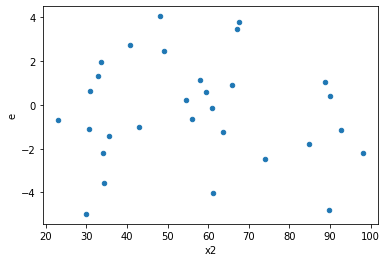

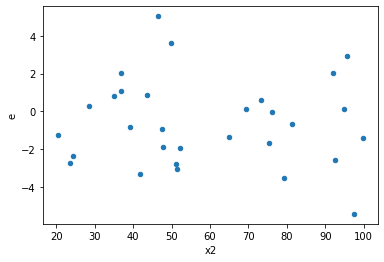

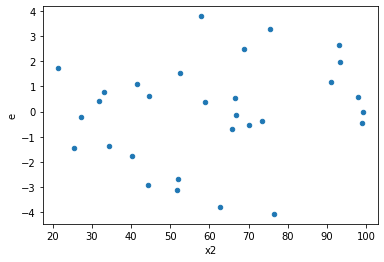

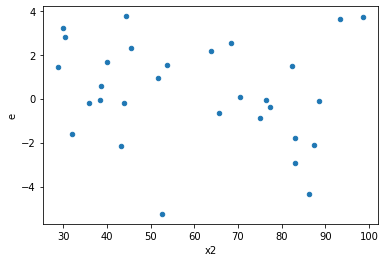

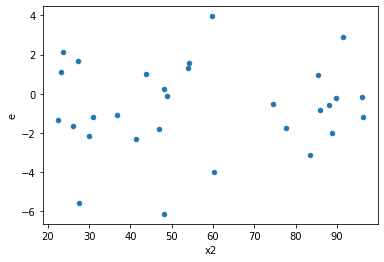

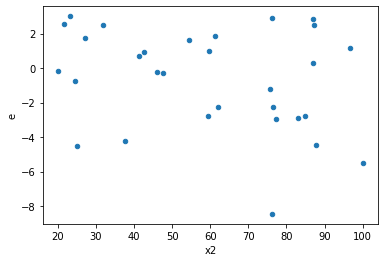

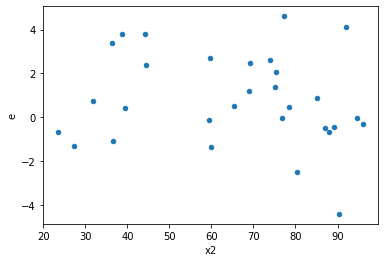

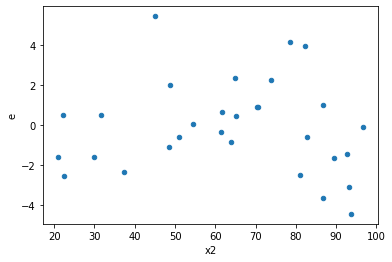

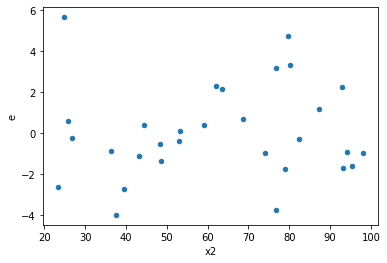

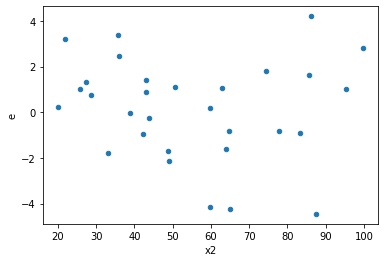

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,10.0,16.0,24.84090003677327,81.55171112987404,2.484090003677327,5.096981945617127,2.0518507534235075,0.1929080661542284,0.9035459669228858,0.0964540330771142,Reject005=1 : Homoscedasticity
6.0,11.0,15.0,28.67518535277567,75.48672422146079,2.6068350320705154,5.032448281430719,1.9304820671500744,0.23503553875576522,0.8824822306221174,0.11751776937788261,Reject005=1 : Homoscedasticity
7.0,11.0,15.0,44.72714355367955,79.53152909441259,4.066103959425413,5.302101939627506,1.3039759909081994,0.6204017993619373,0.6897991003190314,0.31020089968096864,Reject005=1 : Homoscedasticity
8.0,13.0,13.0,65.90990246184663,69.78880406342437,5.069992497065125,5.368369543340336,1.0588515755098125,0.9194527313440057,0.5402736343279971,0.45972636567200287,Reject005=1 : Homoscedasticity
14.0,13.0,13.0,35.60778065924913,59.122781007203876,2.7390600507114717,4.547906231323375,1.6603893843590813,0.372357224571511,0.8138213877142445,0.1861786122857555,Reject005=1 : Homoscedasticity
18.0,14.0,12.0,20.205473274059145,34.74277441397222,1.4432480910042247,2.8952312011643517,2.0060523337673875,0.23369243027295594,0.883153784863522,0.11684621513647797,Reject005=1 : Homoscedasticity
19.0,11.0,15.0,44.15951201512821,79.97668500960879,4.014501092284383,5.331779000640585,1.3281299165388016,0.5977423112674787,0.7011288443662607,0.29887115563373934,Reject005=1 : Homoscedasticity
22.0,22.0,4.0,154.2545447690835,34.564309905171015,7.011570216776523,8.641077476292754,1.2324026158387922,0.937341578124931,0.5313292109375345,0.4686707890624655,Reject005=1 : Homoscedasticity
25.0,9.0,17.0,30.25508721171624,150.15909875855039,3.36167635685736,8.83288816226767,2.6275248490979166,0.08251490019239038,0.9587425499038048,0.04125745009619519,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,13.0,13.0,75.35268730273594,61.855745716615296,5.7963605617489184,4.758134285893484,0.8208830757170542,0.7272587650770875,Reject005=1 : Homoscedasticity
1.0,19.0,7.0,112.62705060347466,30.141139170527428,5.927739505446034,4.305877024361061,0.7263944409846439,0.5422985451789764,Reject005=1 : Homoscedasticity
2.0,20.0,6.0,78.53014351863226,16.966754488009798,3.926507175931613,2.8277924146683,0.7201801214071055,0.5346017128951995,Reject005=1 : Homoscedasticity
3.0,10.0,16.0,24.84090003677327,81.55171112987404,2.484090003677327,5.096981945617127,2.0518507534235075,0.1929080661542284,Reject005=1 : Homoscedasticity
4.0,14.0,12.0,85.98214419267046,54.70626441243224,6.14158172804789,4.558855367702686,0.7422933650598386,0.5885820407771073,Reject005=1 : Homoscedasticity
5.0,19.0,7.0,182.93438152513232,32.421778034943245,9.628125343428017,4.631682576420464,0.48105756948645934,0.1940715144746487,Reject005=1 : Homoscedasticity
6.0,11.0,15.0,28.67518535277567,75.48672422146079,2.6068350320705154,5.032448281430719,1.9304820671500744,0.23503553875576522,Reject005=1 : Homoscedasticity
7.0,11.0,15.0,44.72714355367955,79.53152909441259,4.066103959425413,5.302101939627506,1.3039759909081994,0.6204017993619373,Reject005=1 : Homoscedasticity
8.0,13.0,13.0,65.90990246184663,69.78880406342437,5.069992497065125,5.368369543340336,1.0588515755098125,0.9194527313440057,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      908
Reject005=0 : Heteroscedasticity     92
Name: Result_test, dtype: int64